In [1]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
import seaborn as sns
%matplotlib inline

class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]

def get_data_simple_connect(data):
    return np.hstack((data,data))

def get_data_even_connect(data):
    return np.hstack((data,data[::-1]))

# 原点で点対称
def get_data_odd_connect(data):
    return np.hstack((data,data[::-1]*(-1)))

# ランチョス法を適用後に奇接続する場合
def get_data_odd_connect2(data):
    bias = data[0]
    data -= bias
    data_odd = get_data_odd_connect(data)
    data_odd += bias
    return data_odd

# ランチョスしたのを返す
def Lanczos(data):
    points = len(data)
    left = int(data[0])
    right = int(data[len(data)-1])
    result = np.zeros(points)

    for i in range(points):
#         result[i] = data[i] - ((right-left)*i/(points-1) + left)
        result[i] = data[i] - ((right-left)*i/(points-1))
    
    return result

AIRPLANE   = ImageLoader("Mono/Airplane.bmp")
BARBARA    = ImageLoader("Mono/BARBARA.bmp")
BOAT       = ImageLoader("Mono/BOAT.bmp")
BRIDGE     = ImageLoader("Mono/BRIDGE.bmp")
BUILDING   = ImageLoader("Mono/Building.bmp")
CAMERAMAN  = ImageLoader("Mono/Cameraman.bmp")
GIRL       = ImageLoader("Mono/girl.bmp")
LAX        = ImageLoader("Mono/LAX.bmp")
LENNA      = ImageLoader("Mono/LENNA.bmp")
LIGHTHOUSE = ImageLoader("Mono/Lighthouse.bmp")
SIDBAtitle = ImageLoader("Mono/SIDBAtitle256.bmp")
TEXT       = ImageLoader("Mono/Text.bmp")
WOMAN      = ImageLoader("Mono/WOMAN.bmp")

# 矩形波のパラメータ

In [2]:
# ジャンプ幅
h = 1
# 傾き
grad = 0.2

# 矩形波

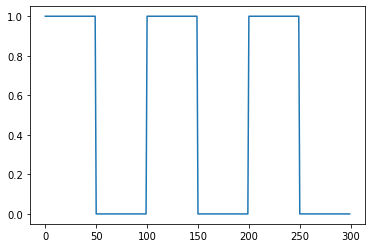

In [3]:
zero = np.linspace(0,0,50)
one = np.linspace(h,h,50)
kukei = np.hstack((one,zero))
kukei1 = np.hstack((kukei,kukei))
kukei1 = np.hstack((kukei1,kukei))
# plt.xticks(np.arange(0, 350, 50),['-T','-T/2','0','T/2','T','3/2T','2T'], fontsize=14) # πtex表記
plt.plot(kukei1)
plt.savefig('output/output_20.png',dpi=300)

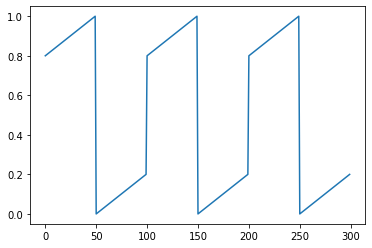

In [4]:
data = np.linspace(0,grad,50)
data1 = np.linspace(h-grad,h,50)
kukei = np.hstack((data1,data))
kukei2 = np.hstack((kukei,kukei))
kukei2 = np.hstack((kukei2,kukei))
plt.plot(kukei2)
plt.savefig('output/output_20.png',dpi=300)

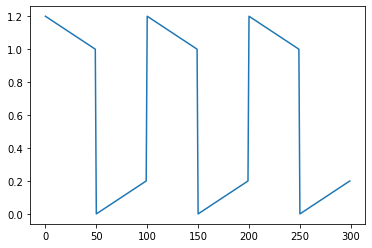

In [5]:
data = np.linspace(0,grad,50)
data1 = np.linspace(h+grad,h,50)
kukei = np.hstack((data1,data))
kukei3 = np.hstack((kukei,kukei))
kukei3 = np.hstack((kukei3,kukei))
plt.plot(kukei3)
plt.savefig('output/output_20.png',dpi=300)

# 周波数解析

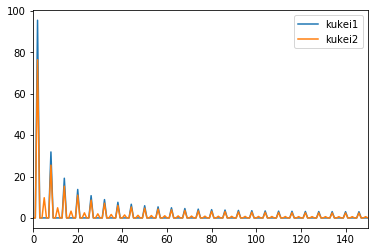

In [6]:
f_1 = np.abs(np.fft.fft(kukei1))
f_2 = np.abs(np.fft.fft(kukei2))
f_3 = np.abs(np.fft.fft(kukei3))

plt.plot(f_1[1:],label="kukei1")
plt.plot(f_2[1:],label="kukei2")
# plt.plot(f_3[1:],label="kukei3")
plt.xlim(0,150)
plt.legend()

plt.savefig('output/output_20.png',dpi=300)

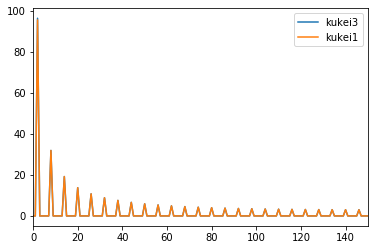

In [9]:
f_1 = np.abs(np.fft.fft(kukei1))
f_2 = np.abs(np.fft.fft(kukei2))
f_3 = np.abs(np.fft.fft(kukei3))

plt.plot(f_3[1:],label="kukei3")
plt.plot(f_1[1:],label="kukei1")
# plt.plot(f_2[1:],label="kukei2")
plt.xlim(0,150)
plt.legend()
plt.savefig('output/output_20.png',dpi=300)

のこぎり波に近くなって、別の周波数成分が出てきて、全体的にエネルギーが低域に寄る！？

つまり、ジャンプ幅$h$の時、$grad=h/2$が最大？
それよりも大きくしたらどうなる？

それって、一階導関数が連続になるっていう条件がギブス現象の軽減に有効だっていうことじゃん

でも、三角波の方が高周波は小さくなる

ということは、まずは不連続点を避けるということが目標で、その上で、導関数の連続を考えていくといいっていうことかな

よくよく考えれば、信号列をいくつかとってきて、ランチョス法するわけだけど、その端点の高さはそろえられて、連続に周期的延長できるけど、  
その信号列の中にある不連続点はランチョス法ではなくせないよね  
でも、矩形波とのこぎり波、どちらも不連続点があるのに、一階導関数が連続になるのこぎり波の方が高周波が小さくなるってことは、  
その間で発生した不連続点を避けることはできなくても、その信号の導関数を連続にできるのであれば、より高周波を小さくしていくことができると考えられるわけ。

In [8]:
f_1

array([1.50000000e+02, 6.10622664e-16, 0.00000000e+00, 9.55086756e+01,
       0.00000000e+00, 1.56214860e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.18781614e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.13787315e-15, 0.00000000e+00, 1.91773597e+01,
       0.00000000e+00, 2.46706791e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.37524316e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.99765207e-16, 0.00000000e+00, 1.07530310e+01,
       0.00000000e+00, 1.14319010e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.85640438e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.65929270e-16, 0.00000000e+00, 7.55386109e+00,
       0.00000000e+00, 1.52510252e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.60806779e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86612639e-16, 0.00000000e+00, 5.89343010e+00,
       0.00000000e+00, 9.46949758e-16, 0.00000000e+00, 0.00000000e+00,
      

In [16]:
f_3

array([1.50000000e+02, 1.80816445e-15, 0.00000000e+00, 7.74073349e+01,
       0.00000000e+00, 1.57731138e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.55396489e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38542488e-15, 0.00000000e+00, 1.53498456e+01,
       0.00000000e+00, 2.18993680e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.10048108e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.99334262e-16, 0.00000000e+00, 8.60375116e+00,
       0.00000000e+00, 5.95837144e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08583492e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.27888899e-15, 0.00000000e+00, 6.04350888e+00,
       0.00000000e+00, 8.88988145e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.28671926e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01437245e-15, 0.00000000e+00, 4.71491952e+00,
       0.00000000e+00, 1.95056741e-15, 0.00000000e+00, 0.00000000e+00,
      

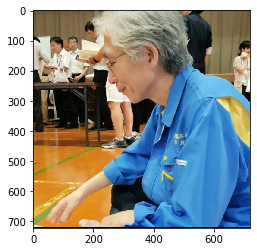

In [4]:
img = ImageLoader("Ori/Screenshot_20191029-163059.png")
plt.imshow(img.img)

ValueError: x and y can be no greater than 2-D, but have shapes (722,) and (722, 720, 3)

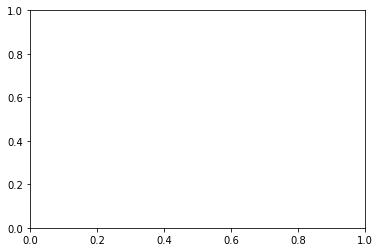

In [6]:
data = scipy.fftpack.dct(scipy.fftpack.dct(img.img,axis=0,),axis=1)
plt.(data)